In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
d4 = np.genfromtxt('hor1dir6pix/HORI_pix_2212_d6_dist.dat',names=True)

In [3]:
psf = np.genfromtxt('elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)

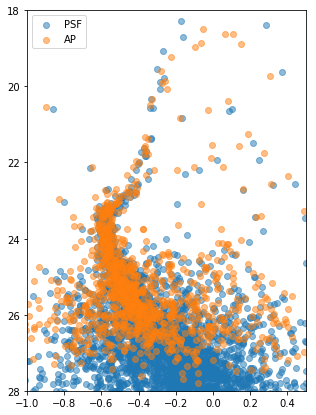

In [4]:
fig,ax = plt.subplots(figsize=(5,7))

ax.scatter(psf['m606c']-psf['m814c'],psf['m606c'],alpha=0.5,label='PSF')
ax.scatter(d4['mean_f606w']-d4['mean_f814w'],d4['mean_f606w'],alpha=0.5,label='AP')


ax.set_ylim(28,18)
ax.set_xlim(-1,0.5)
ax.legend()

plt.show()

In [5]:
len(d4[d4['pos_std_f606w']<0.1])

196

In [9]:
keep = d4['mean_f606w']!=d4['mean_f606w']
for ll in range(len(d4)):
    temp_keep1 = np.logical_and(np.logical_and(d4['mean_f606w']>=21,d4['mean_f606w']<=24.5),
                             np.logical_and(d4['pos_std_f606w']<0.5,d4['stdev_f606w']<0.1))
    temp_keep = np.logical_and(temp_keep1,d4['mean_f606w']-d4['mean_f814w']<-0.3)
    keep = np.logical_or(keep,temp_keep)
    

In [10]:
len(d4['mean_f606w'][keep])

190

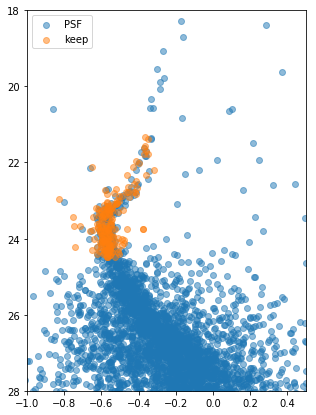

In [11]:
fig,ax = plt.subplots(figsize=(5,7))

ax.scatter(psf['m606c']-psf['m814c'],psf['m606c'],alpha=0.5,label='PSF')
# ax.scatter(d4['mean_f606w']-d4['mean_f814w'],d4['mean_f606w'],alpha=0.5,label='AP')
ax.scatter(d4['mean_f606w'][keep]-d4['mean_f814w'][keep],
           d4['mean_f606w'][keep],alpha=0.5,label='keep')


ax.set_ylim(28,18)
ax.set_xlim(-1,0.5)
ax.legend()

plt.show()

In [28]:
gen_keep = d4[keep]

# mean2_1 = d4['mag2_f606w'][keep]-d4['mag1_f606w'][keep]

In [36]:
len(gen_keep[abs(gen_keep['cut_idx_f606w']-0) <= 1e-3])

25

In [37]:
len(gen_keep[abs(gen_keep['cut_idx_f606w']-1) <= 1e-3])

20

In [38]:
len(gen_keep[abs(gen_keep['cut_idx_f606w']-2) <= 1e-3])

27

In [39]:
len(gen_keep[abs(gen_keep['cut_idx_f606w']-3) <= 1e-3])

17

In [40]:
len(gen_keep[abs(gen_keep['cut_idx_f606w']-4) <= 1e-3])

8

In [45]:
keeper = gen_keep['mean_f606w']!=gen_keep['mean_f606w']
keep_2 = np.logical_and(abs(gen_keep['cut_idx_f606w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f606w']-1) >= 1e-3)
keep2 = np.logical_or(keeper,keep_2)

In [47]:
keep_3 = np.logical_and(abs(gen_keep['cut_idx_f606w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f606w']-2) >= 1e-3)
keep3 = np.logical_or(keeper,keep_3)

In [49]:
keep_4 = np.logical_and(abs(gen_keep['cut_idx_f606w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f606w']-3) >= 1e-3)
keep4 = np.logical_or(keeper,keep_4)

In [51]:
keep_a = np.logical_and(abs(gen_keep['cut_idx_f606w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f606w']-4) >= 1e-3)
keepa = np.logical_or(keeper,keep_a)

In [53]:
mean2_1 = np.mean(gen_keep['mag1_f606w'][keep2]-gen_keep['mag2_f606w'][keep2])
print(mean2_1)

0.006428461538461874


In [55]:
mean3_1 = np.mean(gen_keep['mag1_f606w'][keep3]-gen_keep['mag3_f606w'][keep3])
print(mean3_1)

-0.00562022222222238


In [56]:
mean4_1 = np.mean(gen_keep['mag1_f606w'][keep4]-gen_keep['mag4_f606w'][keep4])
print(mean4_1)

0.007606000000000018
